<a href="https://colab.research.google.com/github/DSamson24/Big_Mart_Sales/blob/master/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY LIBRARIES**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORTING THE DATASET**

In [0]:
big_mart=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

**DATA AUDIT**

In [3]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:
big_mart['Item_Fat_Content']=big_mart['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')

In [0]:
big_mart['Item_Fat_Content']=big_mart['Item_Fat_Content'].replace('reg','Regular')

In [6]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**IMPUTING THE MISSING VALUE**

In [7]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
big_mart.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [9]:
big_mart['Item_Weight'].isnull().sum()

1463

In [0]:
big_mart['Item_Weight']=big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean())

In [11]:
big_mart['Item_Weight'].isnull().sum()

0

In [12]:
big_mart['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
big_mart['Outlet_Size'].isnull().sum()

2410

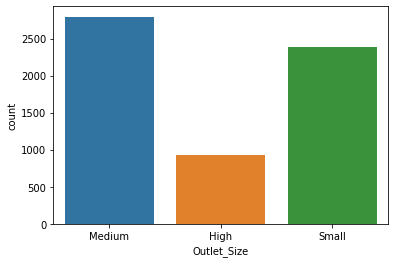

In [14]:
sns.countplot(x='Outlet_Size',data=big_mart)

In [0]:
table=pd.crosstab(big_mart['Outlet_Size'],big_mart['Outlet_Type'])

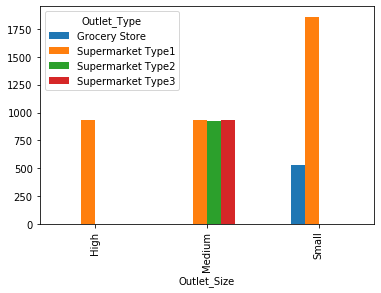

In [16]:
table.plot(kind='bar')

In [0]:
table1=pd.crosstab(big_mart['Outlet_Size'],big_mart['Outlet_Location_Type'])

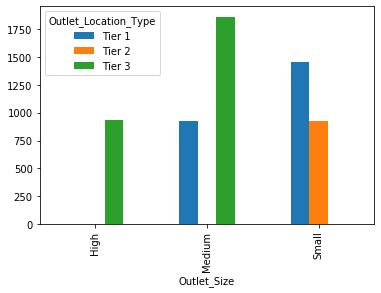

In [18]:
table1.plot(kind='bar')

In [19]:
big_mart['Outlet_Size'].isnull().sum()

2410

In [0]:
mode=big_mart['Outlet_Size'].mode()

In [21]:
mode

0    Medium
dtype: object

In [0]:
big_mart['Outlet_Size']=big_mart['Outlet_Size'].fillna(mode[0])

In [23]:
big_mart['Outlet_Size'].isnull().sum()

0

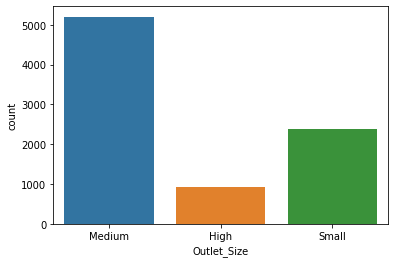

In [24]:
sns.countplot(x='Outlet_Size',data=big_mart)

**PREPROCESSING OF DATA(Uni-Variate)**

In [0]:
skewness=big_mart.skew()

In [26]:
skewness

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

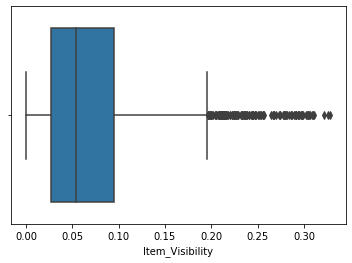

In [27]:
sns.boxplot(big_mart['Item_Visibility'])

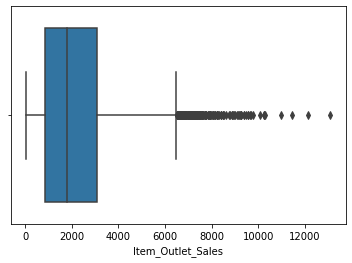

In [28]:
sns.boxplot(big_mart['Item_Outlet_Sales'])

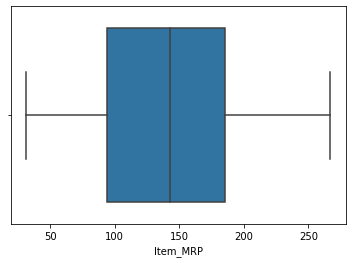

In [29]:
sns.boxplot(big_mart['Item_MRP'])

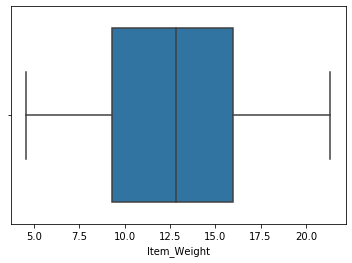

In [30]:
sns.boxplot(big_mart['Item_Weight'])

In [0]:
big_mart['Outlet_Years_Of_Service']=pd.datetime.now().year-big_mart['Outlet_Establishment_Year']

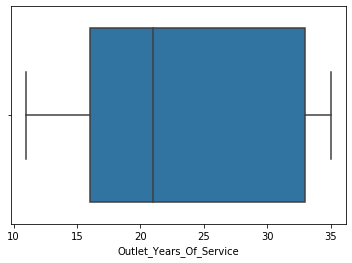

In [32]:
sns.boxplot(big_mart['Outlet_Years_Of_Service'])

In [0]:
del big_mart['Outlet_Establishment_Year']

In [0]:
skewness=big_mart.skew()

In [35]:
skewness

Item_Weight                0.090561
Item_Visibility            1.167091
Item_MRP                   0.127202
Item_Outlet_Sales          1.177531
Outlet_Years_Of_Service    0.396641
dtype: float64

**PROCESSING OF DATA(Bi-Variate)**

In [0]:
correlation=big_mart.corr()

In [37]:
correlation

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years_Of_Service
Item_Weight,1.000000,-0.012049,0.024756,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000,0.049135
Outlet_Years_Of_Service,0.008301,0.074834,-0.005020,0.049135,1.000000


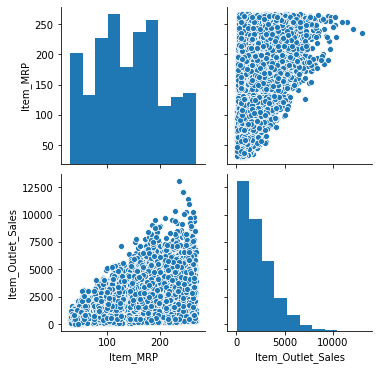

In [38]:
sns.pairplot(big_mart, vars=["Item_MRP", "Item_Outlet_Sales"])

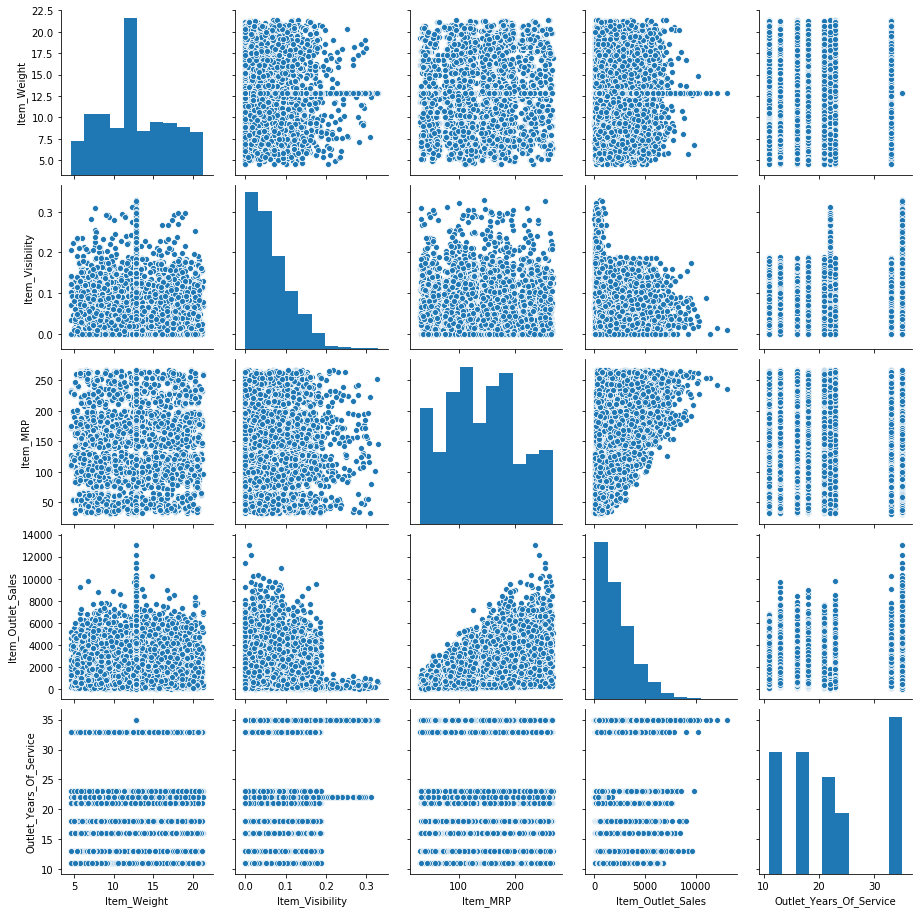

In [39]:
sns.pairplot(big_mart)